In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy as np
from keras import layers, models


from tensorflow.keras.datasets import mnist

# Load Dataset


In [8]:
# Load the dataset from the .npz file
data = np.load('mnist.npz')

# Unpack the data into the training and testing sets
(x_train, y_train), (x_test, y_test) = (data['x_train'], data['y_train']), (data['x_test'], data['y_test'])

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


# VISUALIZING DATASET



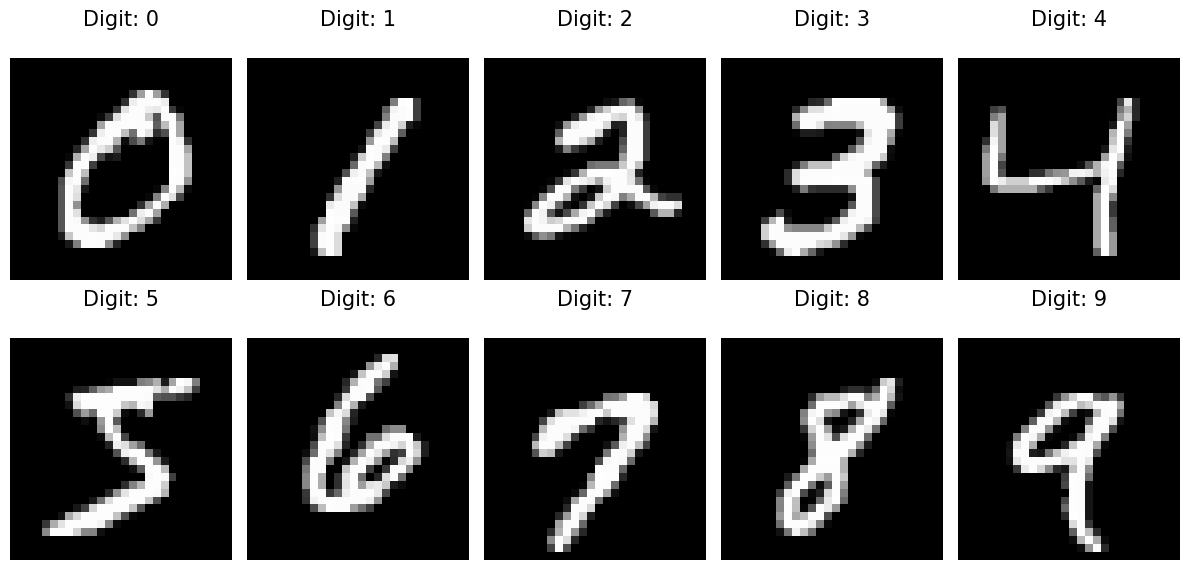

In [7]:
# Create a figure with a 2x5 grid of subplots
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()

# Find and plot the first occurrence of each digit from 0 to 9
for i in range(10):
    # Find the index of the first image with label 'i'
    idx = np.where(y_train == i)[0][0]
    
    # Display the image in the corresponding subplot
    axes[i].matshow(x_train[idx], cmap='gray')
    axes[i].set_title(f"Digit: {i}", fontsize=15)
    axes[i].axis('off') # Hide the axes ticks

plt.tight_layout()
plt.show()

# NORMALIZING 



In [42]:
#  Before normalization
# Example of image 2d pixel values

x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [43]:
# why normalize ? 
# Faster training: Neural networks converge faster when input value range is small (usually 0–1 or -1–1).

# Numerical stability: Large values can make gradients explode or vanish 
# [ exploding gradient & vanishing gradient ]

# Uniform scale:Helps all features(pixels here) contribute equally to learning.
# Normalization ensures every pixel matters proportionally 
# eg : huge values (e.g., 200) and others small (e.g., 1), the big ones dominate the learning.



# [0, 255] → [0, 1]

# grayscale image, with pixel values from 0 to 255 

max_pixel_value = x_train.max()
x_train = x_train.astype("float32") / max_pixel_value
x_test = x_test.astype("float32") / max_pixel_value

In [45]:
# After normalization 

x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# NEURAL NETWORK ARCHITECTURE

In [51]:
# Using , Keras’ Sequential API (a simple stack of layers).

model = models.Sequential([
    layers.Input(shape=(28, 28)),
    # shape of input
    
    layers.Flatten(),          
    # Flatten layer : Converts the 2D input (28x28) into a 1D vector of length 784 (28*28).
    # Needed because Dense layers only accept 1D inputs.
    
    layers.Dense(256, activation='relu'), # Dense = fully connected layer , 256 neurons → the layer will output vector of size 256
    layers.Dense(128, activation='tanh'), # Act functions like ReLu [ max(0,x) ]Introduce non-linearity, so the network can learn complex patterns
    layers.Dense(64, activation='relu'),  # tanh: outputs values between -1 and 1, helpful to handle negative activations
    layers.Dense(10, activation='softmax') # Output layer for classification :  10 total output values 0 -> 9
    # Softmax activation: converts  outputs into probabilities that sum to 1
])

In [52]:
model.summary()


# number of trainable parameters (weights + biases) in each layer
    # Parameters=(input units × output units)+output units (biases)

# 242,762 parameters are what the network will learn during training.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Ready the model for training
# model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# SGD : Stochastic Gradient Descent Algorithm: updates weights during training to minimize loss 

# loss=sparse_categorical_crossentropy
    # crossentropy loss function 
    # Loss function for multi-class classification 
    # Measures how far the predicted probabilities are from the true class

# metrics=accuracy
    # model will use this for monitoring performance during training and testing.
    # eg : metrics=['mse'] → for regression (mean squared error)
    # metrics=['precision', 'recall'] → for classification evaluation

# TRAINING THE MODEL WITH EARLY STOPPING

In [55]:
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss",patience=3,restore_best_weights=True)
# Monitors validation loss (val_loss)
# Stops training if it doesn’t improve for 3 epochs (patience=3)
# Restores model weights from the epoch with the best validation loss

# Validation Loss:
# When training a model, validation check performance on unseen data 
# Validation loss is the error (loss) on the validation set 



# Training the model
history = model.fit(
    x_train, y_train, 
    epochs=50,  
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 824us/step - accuracy: 0.7269 - loss: 1.0190 - val_accuracy: 0.9184 - val_loss: 0.2760
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - accuracy: 0.9237 - loss: 0.2700 - val_accuracy: 0.9366 - val_loss: 0.2112
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - accuracy: 0.9419 - loss: 0.2004 - val_accuracy: 0.9480 - val_loss: 0.1719
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - accuracy: 0.9526 - loss: 0.1648 - val_accuracy: 0.9570 - val_loss: 0.1448
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - accuracy: 0.9602 - loss: 0.1358 - val_accuracy: 0.9617 - val_loss: 0.1309
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - accuracy: 0.9663 - loss: 0.1176 - val_accuracy: 0.9629 - val_loss: 0.1190
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 820us/step - accuracy: 0.9714 - loss: 0.1022 - val_accuracy: 0.9660 - val_loss: 0.1091
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - accuracy: 0.9743 -

In [ ]:
# Train Loss:
    # error on the training data.
    # Lower train loss = model fits the training data well
# Test Loss:
    # error on the testing data.
    # Lower test loss = model fits the test data well

In [56]:
# model.evaluate returns loss and accuracy.
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
print(f"Training Loss = {train_loss:.3f}")
print(f"Training Accuracy = {train_acc*100:.2f}%")

Training Loss = 0.034
Training Accuracy = 99.17%


In [57]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss = {test_loss:.3f}")
print(f"Test Accuracy = {test_acc*100:.2f}%")

Test Loss = 0.072
Test Accuracy = 97.81%


# PREDICTING TEST SAMPLE



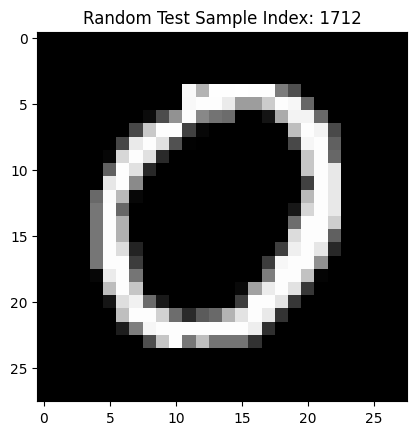

In [58]:
# Pick a random index 
n = random.randint(0, len(x_test)-1)

# Display the randomly selected test image
plt.imshow(x_test[n], cmap='gray')  
plt.title(f"Random Test Sample Index: {n}")

plt.show()

In [64]:
# CHECKING THE PREDICTED VALUE
predicted_values = model.predict(x_test, verbose=0)
predicted_class = np.argmax(predicted_values[n]) # consider the max probability of prediction
print(f"Handwritten number in the displayed image (index {n}) is: {predicted_class}")

Handwritten number in the displayed image (index 1712) is: 0


In [69]:
# List all recorded metrics from training
list(history.history.keys())

['accuracy', 'loss', 'val_accuracy', 'val_loss']

# GRAPHS


### Validation Accuracy v/s Epochs
- We can see effects of early stopping

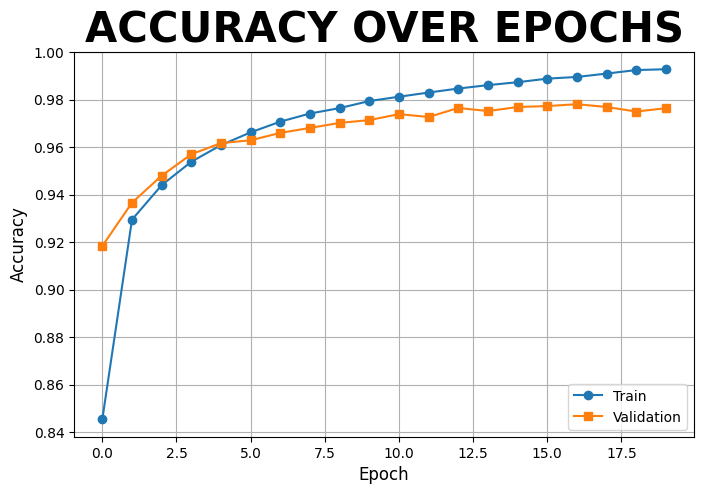

In [73]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], marker='o')
plt.plot(history.history['val_accuracy'], marker='s')
plt.title('ACCURACY OVER EPOCHS', fontsize=30, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid(True)
plt.show()

### Validation loss v/s Epochs

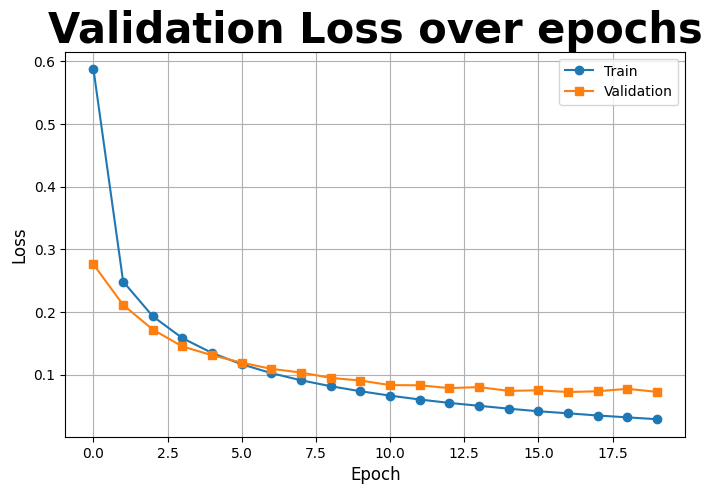

In [75]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], marker='o')
plt.plot(history.history['val_loss'], marker='s')
plt.title('Validation Loss over epochs', fontsize=30, fontweight='bold')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()